In [2]:
import numpy as np

In [23]:
#  matplotlib 相关内容
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [4]:
from mpl_toolkits.basemap import Basemap # 这里导入的是 basemap 库 ，可以不导，因为最后不是用它

In [5]:
# 21 个气候区的定义方式 [ 1 ]

In [20]:
# 21个气候区域的定义方式 顺序是按照字母来的
lat_ranges = [
    ( 60, 72), 
    (-20, 12), 
    (-45,-11), 
    ( 10, 30), 
    ( 30, 50),
    ( 30, 50), 
    (-12, 18), 
    ( 20, 50), 
    ( 25, 50), 
    ( 50, 85), 
    ( 30, 48), 
    ( 50, 70), 
    ( 48, 75), 
    (-35,-12), 
    ( 18, 30),
    (  5, 30), 
    (-11, 20), 
    (-56,-20), 
    ( 30, 50), 
    (-12, 18), 
    ( 30, 60),
]

lon_ranges = [
    (-170,-103), 
    ( -82, -34), 
    ( 110, 155), 
    (-116, -83), 
    (  40,  75), 
    (-103, -85), 
    (  22,  52), 
    ( 100, 145),
    ( -85, -60), 
    (-103, -10), 
    ( -10,  40), 
    (  40, 180), 
    ( -10,  40), 
    ( -10,  52), 
    ( -20,  65), 
    (  65, 100), 
    (  95, 155), 
    ( -76, -40), 
    (  75, 100), 
    ( -20,  22), 
    ( -130, -103),
]


#写名字 顺序对应
list_region = [
    "ALA",
    "AMZ",
    "AUS",
    "CAM",
    "CAS",
    "CNA",
    "EAF",
    "EAS",
    "ENA",
    "GRL",
    "MED",
    "NAS",
    "NEU",
    "SAF",
    "SAH",
    "SAS",
    "SEA",
    "SSA",
    "TIB",
    "WAF",
    "WNA",
]

In [7]:
# 这里是存成字典的方式，但是在后面没有用过
climate_regions = {
    "SEA": {'lat_range': (-11, 20), 'lon_range': (95, 155), 'color': 'blue'},
    "EAS": {'lat_range': (20, 50), 'lon_range': (100, 145), 'color': 'red'},
    "SAS": {'lat_range': (5, 30), 'lon_range': (65, 100), 'color': 'green'},
    "CAS": {'lat_range': (30, 50), 'lon_range': (40, 75), 'color': 'purple'},
    "TIB": {'lat_range': (30, 50), 'lon_range': (75, 100), 'color': 'orange'},
    "NAS": {'lat_range': (50, 70), 'lon_range': (40, 180), 'color': 'brown'},
    "AUS": {'lat_range': (-45, -11), 'lon_range': (110, 155), 'color': 'pink'},
    "AMZ": {'lat_range': (-20, 12), 'lon_range': (-82, -34), 'color': 'gray'},
    "SSA": {'lat_range': (-56, -20), 'lon_range': (-76, -40), 'color': 'navy'},
    "CAM": {'lat_range': (10, 30), 'lon_range': (-116, -83), 'color': 'yellow'},
    "WNA": {'lat_range': (30, 60), 'lon_range': (-130, -103), 'color': 'cyan'},
    "CNA": {'lat_range': (30, 50), 'lon_range': (-103, -85), 'color': 'magenta'},
    "ENA": {'lat_range': (25, 50), 'lon_range': (-85, -60), 'color': 'teal'},
    "ALA": {'lat_range': (60, 72), 'lon_range': (-170, -103), 'color': 'olive'},
    "GRL": {'lat_range': (50, 85), 'lon_range': (-103, -10), 'color': 'lime'},
    "MED": {'lat_range': (30, 48), 'lon_range': (-10, 40), 'color': 'indigo'},
    "NEU": {'lat_range': (48, 75), 'lon_range': (-10, 40), 'color': 'salmon'},
    "WAF": {'lat_range': (-12, 18), 'lon_range': (-20, 22), 'color': 'gold'},
    "EAF": {'lat_range': (-12, 18), 'lon_range': (22, 52), 'color': 'lavender'},
    "SAF": {'lat_range': (-35, -12), 'lon_range': (-10, 52), 'color': 'crimson'},
    "SAH": {'lat_range': (18, 30), 'lon_range': (-20, 65), 'color': 'turquoise'}
}

In [8]:
# 下面是正常开始画图的部分

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [10]:
import matplotlib.pyplot as plt

In [11]:
import cmaps# 这是那个ncl的色带

cmap_color=cmaps.ncl_default

In [ ]:
#数据导入部分

In [13]:
numSheet2_all = [
    0.34,
    -0.05,
    0.03 ,
    0.15 ,
    -0.04 ,
    0.22 ,
    0.11 ,
    0.09 ,
    0.15 ,
    0.20 ,
    0.13 ,
    0.22 ,
    0.28 ,
    0.05 ,
    0.04 ,
    -0.02 ,
    0.33 ,
    -0.01 ,
    -0.16 ,
    0.05 ,
    0.13
]

In [14]:
numSheet2_ext = [
    0.29 ,
    0.03 ,
    0.01 ,
    0.03 ,
    0.03 ,
    0.03 ,
    0.02 ,
    0.08 ,
    0.05 ,
    0.05 ,
    0.02 ,
    0.06 ,
    0.11 ,
    0.09 ,
    -0.04 ,
    -0.01 ,
    0.31 ,
    0.01 ,
    -0.11 ,
    0.00 ,
    -0.02
] 

In [15]:
numSheet3_all =[
    -0.14 ,
    -0.02 ,
    0.10 ,
    -0.10 ,
    0.07 ,
    -0.12 ,
    -0.02 ,
    0.04 ,
    -0.06 ,
    -0.17 ,
    -0.03 ,
    -0.05 ,
    0.01 ,
    -0.02 ,
    0.00 ,
    0.00 ,
    -0.01 ,
    0.07 ,
    0.03 ,
    -0.06 ,
    -0.04 
]

In [16]:
numSheet3_ext = [
    0.30 ,
    0.07 ,
    0.10 ,
    0.14 ,
    0.17 ,
    0.13 ,
    0.09 ,
    0.15 ,
    0.15 ,
    0.14 ,
    0.13 ,
    0.24 ,
    0.18 ,
    0.08 ,
    0.12 ,
    0.07 ,
    -0.06 ,
    0.06 ,
    0.11 ,
    0.06 ,
    0.11 
]

In [17]:
numSheet4_all = [
    0.42 ,
    0.22 ,
    0.21 ,
    0.31 ,
    0.44 ,
    0.23 ,
    0.30 ,
    0.37 ,
    0.32 ,
    0.51 ,
    0.44 ,
    0.46 ,
    0.47 ,
    0.24 ,
    0.45 ,
    0.21 ,
    0.21 ,
    0.10 ,
    0.39 ,
    0.25 ,
    0.22 
]

In [18]:
numSheet4_ext = [
    0.29 ,
    0.11 ,
    0.22 ,
    0.25 ,
    0.34 ,
    0.31 ,
    0.26 ,
    0.24 ,
    0.27 ,
    0.35 ,
    0.27 ,
    0.48 ,
    0.25 ,
    0.11 ,
    0.38 ,
    0.21 ,
    0.20 ,
    0.17 ,
    0.39 ,
    0.26 ,
    0.24 
]

In [25]:
import matplotlib

In [26]:
norm = matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5)#色带的范围是-40至40
color0=matplotlib.cm.coolwarm_r(norm(10),bytes=True)

In [27]:
# 修改颜色编码
cmap_reversed = list(reversed(matplotlib.cm.coolwarm(np.arange(256))))

In [28]:
# 这个函数的作用是生成一个色带，并把数据放在一个色带上
def get_color_from_value(val):
    # 将val限制在[-0.5, 0.5]范围内
    val = max(-0.5, min(0.5, val))
    
    # 将输入值映射到[0, 1]范围内
    val_norm = (val + 0.5) / 1.0
    
    # 将颜色值映射到coolwarm色带上
    color_map = matplotlib.cm.coolwarm(val_norm)
    
    # 将RGB颜色转换为16位颜色代码
    color_code = "#{:02X}{:02X}{:02X}".format(*[int(x * 255) for x in color_map[:3]])
    
    return color_code

In [29]:
colorNumSheet2_all = []
for numColorStrp in range(0,21):
    color1 = get_color_from_value(numSheet2_all[numColorStrp])
    colorNumSheet2_all.append(color1)

In [30]:
# 修改 RGB 成 16位 颜色
def from_rgb_to_color16(rgb):
    color = '#'
    for i in rgb:#[216, 187, 219]:#
        num = int(i)
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color

In [31]:
def from_rgb_to_color16(rgb):
    """
    Convert RGB color to 16-bit color
    
    Parameters:
    -----------
    rgb : tuple or list
        RGB values as integers ranging from 0 to 255
    
    Returns:
    --------
    color : str
        16-bit color code as a string, starting with '#'
    """
    color = '#'
    for i in rgb:
        num = int(i)
        color += str(hex(num))[2:].zfill(2).upper()
    return color

In [32]:
colorNumSheet2_all = []
for numColorStrp in range(0,21):
    color1 = get_color_from_value(numSheet2_all[numColorStrp])
    colorNumSheet2_all.append(color1)

In [33]:
colorNumSheet2_ext = []
for numColorStrp in range(0,21):
    color1=get_color_from_value(numSheet2_ext[numColorStrp])
    colorNumSheet2_ext.append(color1)

In [34]:
colorNumSheet3_all = []
for numColorStrp in range(0,21):
    color1=get_color_from_value(numSheet3_all[numColorStrp])
    colorNumSheet3_all.append(color1)

In [35]:
colorNumSheet3_ext = []
for numColorStrp in range(0,21):
    color1=get_color_from_value(numSheet3_ext[numColorStrp])
    colorNumSheet3_ext.append(color1)

In [36]:
colorNumSheet4_all = []
for numColorStrp in range(0,21):
    color1=get_color_from_value(numSheet4_all[numColorStrp])
    colorNumSheet4_all.append(color1)

In [37]:
colorNumSheet4_ext = []
for numColorStrp in range(0,21):
    color1=get_color_from_value(numSheet4_ext[numColorStrp])
    colorNumSheet4_ext.append(color1)

In [ ]:
# 设置西文字体为新罗马字体
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',  # 设置字体类型
    "font.size": 14,
#     "mathtext.fontset":'stix',
}

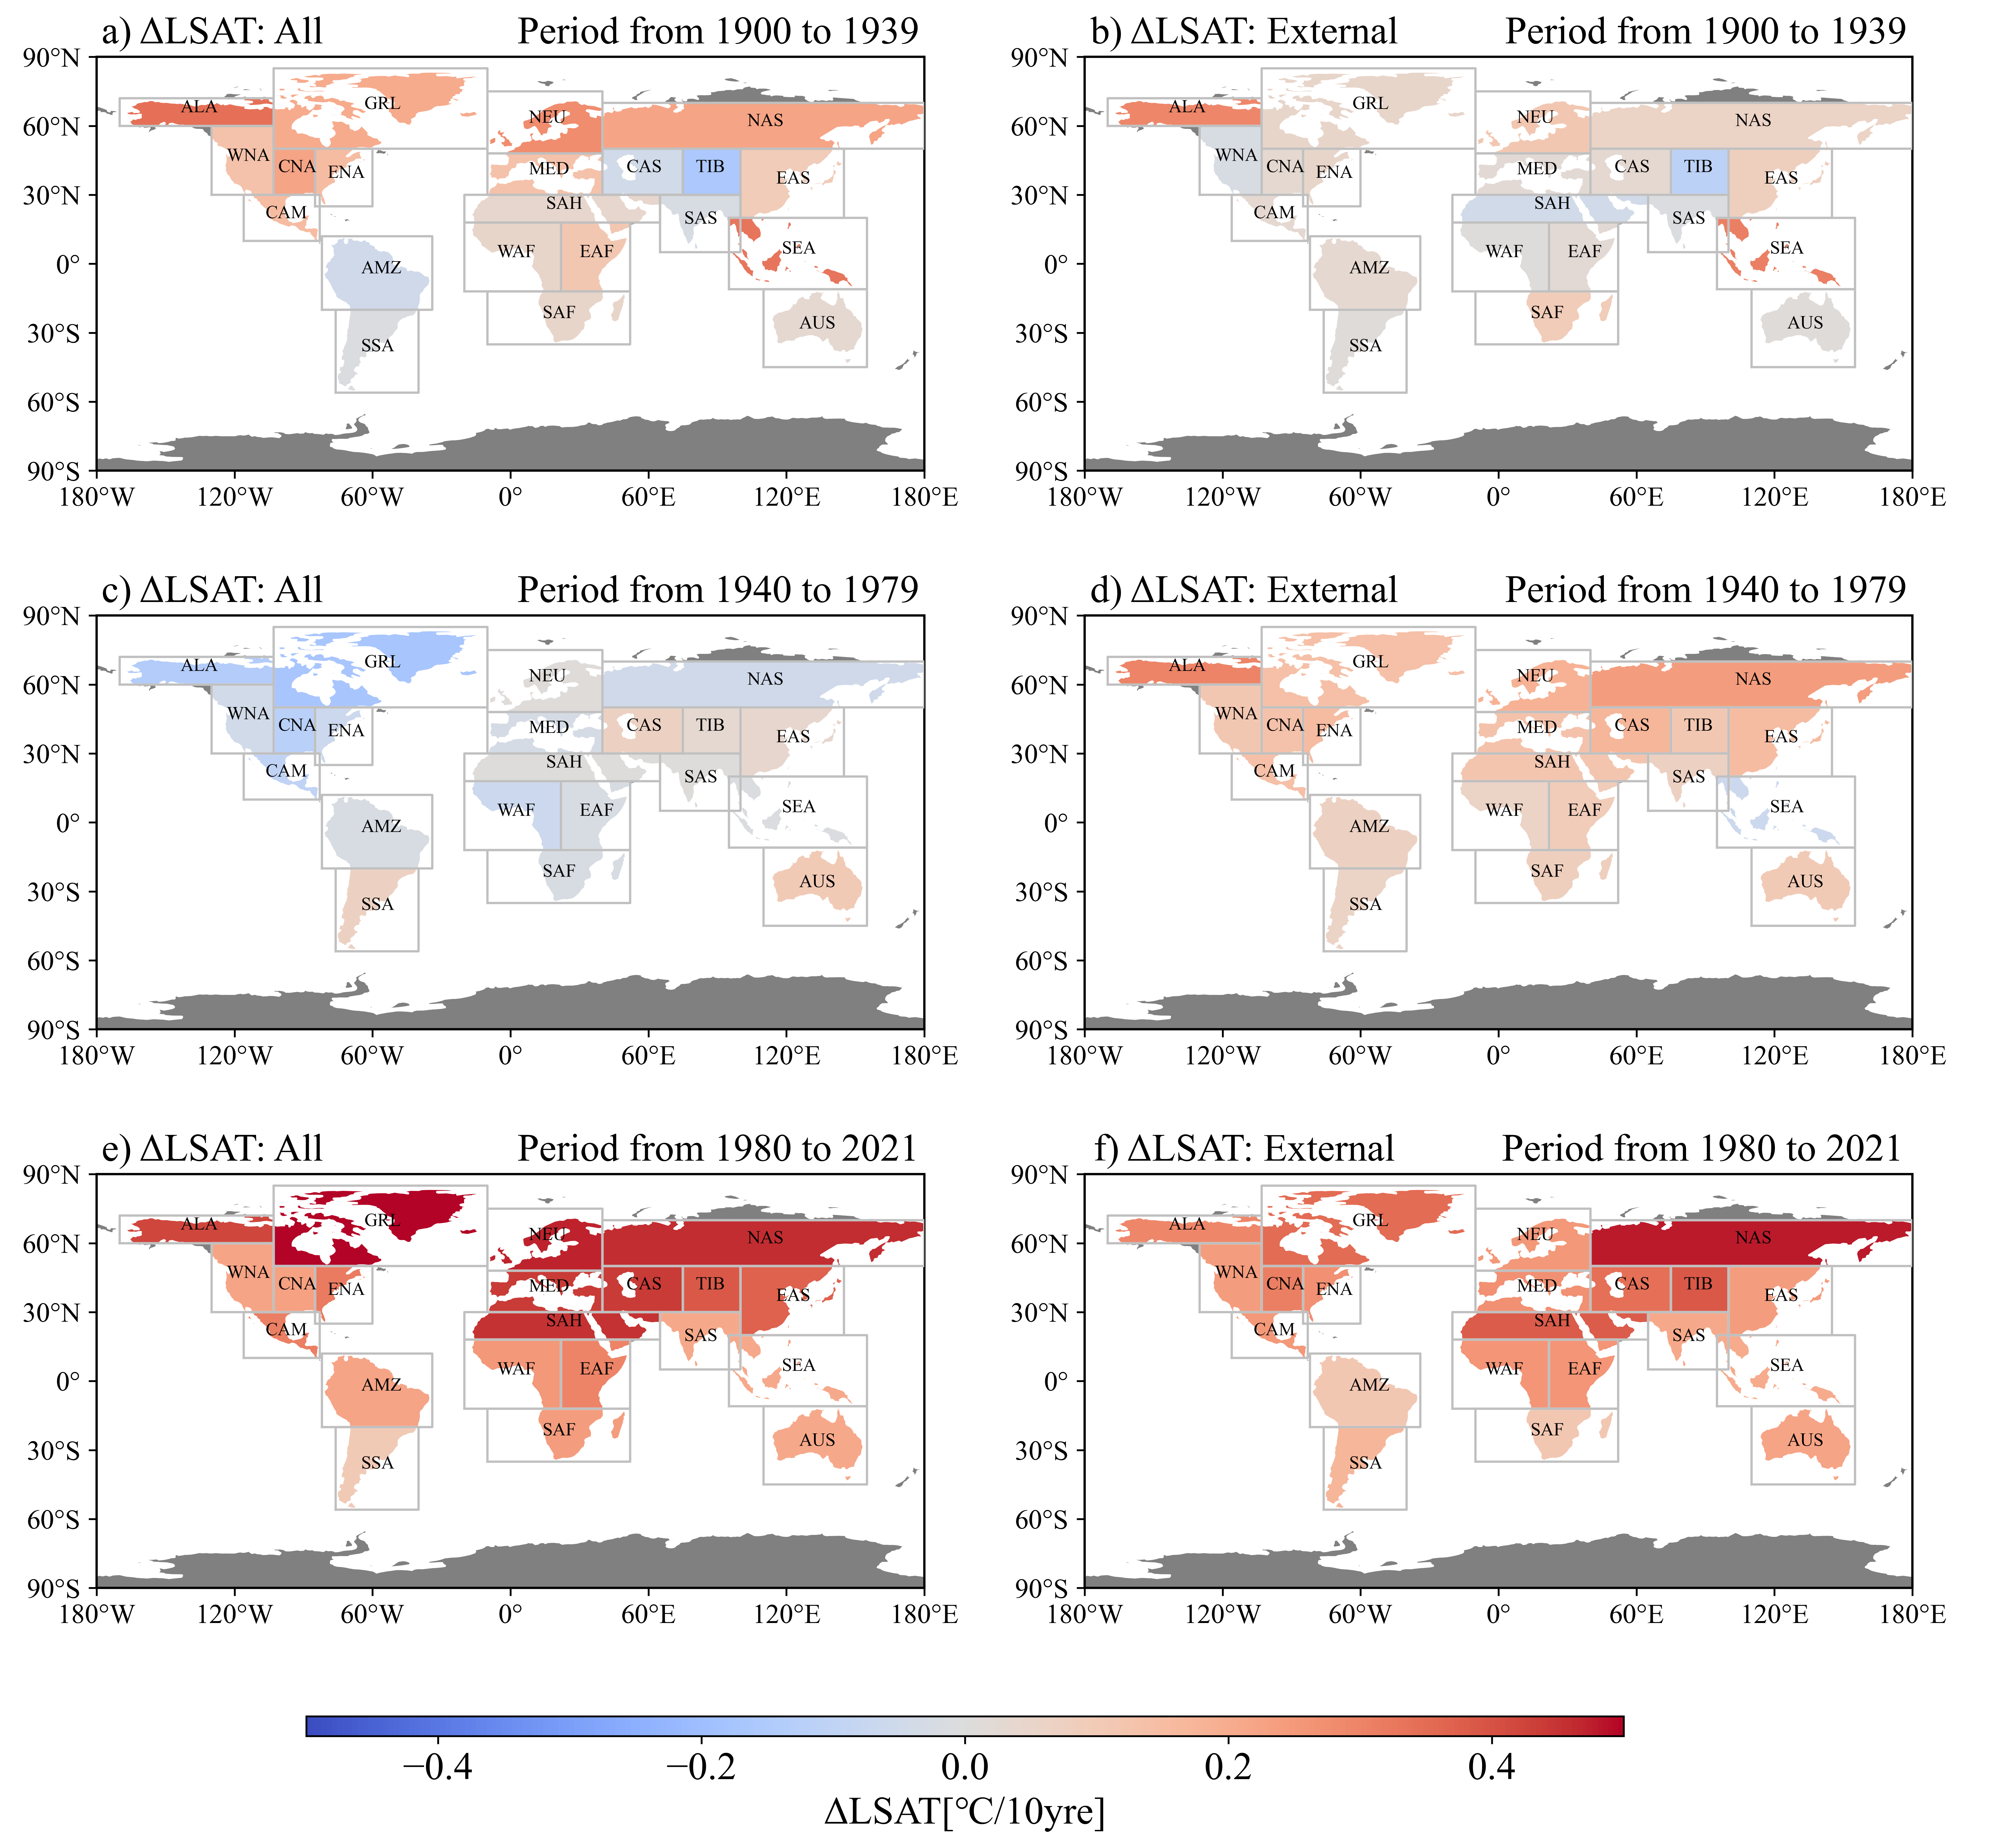

In [45]:
# create a new figure and axes instance
fig = plt.figure(dpi=600,figsize=(16,12))
proj = ccrs.PlateCarree()# 设置投影方式


plt.subplots_adjust(left=0.15,
                    bottom=0.125, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0, 
                    hspace=0.35)


plt.rc("font",family ='Times New Roman',size = 17) # 这一步和上一步相结合，设置全局的字体为新罗马

#———————这里生成一个热图，作用是和地图共享 colorbar，通过拼接吧colorbar放在最下面———————#
# 创建一些数据
data = np.random.randn(10, 10)
vmin, vmax = -0.5, 0.5

# 画图
im = ax.imshow(data, vmin=vmin, vmax=vmax, cmap='coolwarm')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)




#———————————————————正式的地图绘制-1—————————————————————————#

# 子图排列方式subplot（行，列，No.）
plt.subplot(3, 2, 1)

#——————关闭子图边框——————#
# 关闭子图的边框
plt.axis("off") 
# 固定子图画布
ax = fig.add_subplot(321, projection=ccrs.PlateCarree())
# 子图画布基本设置，这里也是关闭子图边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


#——————画地图（底色） drawStep 1/4 ——————#
# set the extent of the map
# 设置画布， 这里是投影方式的设置
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
 
# add features to the map
# 绘制 大陆和海洋
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='white')


#——————画地图（方框） drawStep 2/4 ——————#
# draw the rectangle boxes
# 通过循环把方框画到图里
for i, (lat_range, lon_range) in enumerate(zip(lat_ranges, lon_ranges)):
    
    # define the corners of the box
    # 将坐标统一成方框的坐标
    llcrnrlat, urcrnrlat = lat_range
    llcrnrlon, urcrnrlon = lon_range
    
    # add 360 to the longitude range if it crosses the international dateline
    # 修改负数部分（W）
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360
        
    # 这一部分被优化掉了，因为这里不画不会影响 ，保留是为了辅助思考   
    '''    # draw the box
        # 画方框部分，这里已经是plt在画了
    #    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
    #            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
    #            color='k', linewidth=1, transform=ccrs.PlateCarree())
        '''
    # fill the box with a color (you can change the color as you like)
    # 给方框上色，这里已经是plt在画了
    ax.fill([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color=colorNumSheet2_all[i], alpha=1, transform=ccrs.PlateCarree(),zorder = 1)


#——————画地图（海洋，覆盖用） drawStep 3/4 ——————#    
ax.add_feature(cfeature.OCEAN, facecolor='white',zorder = 2)


#——————画地图（重新画一层盒子） drawStep 4/4 ——————#   
#——————下面这里是在方框里写字 ——————# 
for k, (lat_rangek, lon_rangek) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_rangek
    llcrnrlon, urcrnrlon = lon_rangek
    # 下面保留的是定义经纬度位置 平均值计算位置，加减微调
    ax.text((-7+(llcrnrlon+urcrnrlon)/2), (llcrnrlat+urcrnrlat)/2, list_region[k], fontsize=8, transform=ccrs.PlateCarree())
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='#C0C0C0', linewidth=1, transform=ccrs.PlateCarree(),zorder = 3)

#——————添加标题 ——————#  
# set the title of the plot
ax.set_title('a) ΔLSAT: All                    Period from 1900 to 1939',fontsize = 17)

#——————地图基本设置 ——————#  
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=proj)
ax.set_xticklabels(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E'], fontsize=12)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.set_yticklabels(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N'], fontsize=12)


## 下同，只在最后的设置处修改
#——————————————————— 子图 - 2 —————————————————————————#



plt.subplot(3, 2, 2) 
plt.axis("off")
ax = fig.add_subplot(322, projection=ccrs.PlateCarree())

# set the extent of the map
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# add features to the map
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# draw the rectangle boxes
for i, (lat_range, lon_range) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_range
    llcrnrlon, urcrnrlon = lon_range
    
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360
    
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='w', linewidth=1, transform=ccrs.PlateCarree())
    
    # fill the box with a color (you can change the color as you like)
    ax.fill([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color=colorNumSheet2_ext[i], alpha=1, transform=ccrs.PlateCarree(),zorder = 1)
ax.add_feature(cfeature.OCEAN, facecolor='white',zorder = 2)
#——————下面这里是在方框里写字 ——————# 
for k, (lat_rangek, lon_rangek) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_rangek
    llcrnrlon, urcrnrlon = lon_rangek
    # 下面保留的是定义经纬度位置 平均值计算位置，加减微调
    ax.text((-7+(llcrnrlon+urcrnrlon)/2), (llcrnrlat+urcrnrlat)/2, list_region[k], fontsize=8, transform=ccrs.PlateCarree())
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360
    
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='#C0C0C0', linewidth=1, transform=ccrs.PlateCarree(),zorder = 3)
    # set the title of the plot
ax.set_title('b) ΔLSAT: External           Period from 1900 to 1939',fontsize = 17)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=proj)
ax.set_xticklabels(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E'], fontsize=12)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.set_yticklabels(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N'], fontsize=12)


#——————————————————— 子图 - 3 —————————————————————————#


plt.subplot(3, 2, 3) 
plt.axis("off")
ax = fig.add_subplot(323, projection=ccrs.PlateCarree())

# set the extent of the map
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# add features to the map
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# draw the rectangle boxes
for i, (lat_range, lon_range) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_range
    llcrnrlon, urcrnrlon = lon_range
    
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360
    
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='w', linewidth=1, transform=ccrs.PlateCarree())
    
    # fill the box with a color (you can change the color as you like)
    ax.fill([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color=colorNumSheet3_all[i], alpha=1, transform=ccrs.PlateCarree(),zorder = 1)
ax.add_feature(cfeature.OCEAN, facecolor='white',zorder = 2)
for k, (lat_rangek, lon_rangek) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_rangek
    llcrnrlon, urcrnrlon = lon_rangek
    ax.text((-7+(llcrnrlon+urcrnrlon)/2), (llcrnrlat+urcrnrlat)/2, list_region[k], fontsize=8, transform=ccrs.PlateCarree())
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360
    
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='#C0C0C0', linewidth=1, transform=ccrs.PlateCarree(),zorder = 3)
# set the title of the plot
ax.set_title('c) ΔLSAT: All                    Period from 1940 to 1979',fontsize = 17)

ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=proj)
ax.set_xticklabels(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E'], fontsize=12)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.set_yticklabels(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N'], fontsize=12)


#——————————————————— 子图 - 4 —————————————————————————#


plt.subplot(3, 2, 4) 
plt.axis("off")
ax = fig.add_subplot(324, projection=ccrs.PlateCarree())

# set the extent of the map
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# add features to the map
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# draw the rectangle boxes
for i, (lat_range, lon_range) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_range
    llcrnrlon, urcrnrlon = lon_range
    
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360
    
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='w', linewidth=1, transform=ccrs.PlateCarree())
    
    # fill the box with a color (you can change the color as you like)
    ax.fill([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color=colorNumSheet3_ext[i], alpha=1, transform=ccrs.PlateCarree(),zorder = 1)
ax.add_feature(cfeature.OCEAN, facecolor='white',zorder = 2)
for k, (lat_rangek, lon_rangek) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_rangek
    llcrnrlon, urcrnrlon = lon_rangek
    ax.text((-7+(llcrnrlon+urcrnrlon)/2), (llcrnrlat+urcrnrlat)/2, list_region[k], fontsize=8, transform=ccrs.PlateCarree())
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360
    
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='#C0C0C0', linewidth=1, transform=ccrs.PlateCarree(),zorder = 3)
# set the title of the plot


ax.set_title('d) ΔLSAT: External           Period from 1940 to 1979',fontsize = 17)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=proj)
ax.set_xticklabels(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E'], fontsize=12)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.set_yticklabels(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N'], fontsize=12)


#——————————————————— 子图 - 5 —————————————————————————#

plt.subplot(3, 2, 5) 
plt.axis("off")
ax = fig.add_subplot(325, projection=ccrs.PlateCarree())

# set the extent of the map
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# add features to the map
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# draw the rectangle boxes
for i, (lat_range, lon_range) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_range
    llcrnrlon, urcrnrlon = lon_range
    
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360
    
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='w', linewidth=1, transform=ccrs.PlateCarree())
    
    # fill the box with a color (you can change the color as you like)
    ax.fill([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color=colorNumSheet4_all[i], alpha=1, transform=ccrs.PlateCarree(),zorder = 1)
ax.add_feature(cfeature.OCEAN, facecolor='white',zorder = 2)
for k, (lat_rangek, lon_rangek) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_rangek
    llcrnrlon, urcrnrlon = lon_rangek
    ax.text((-7+(llcrnrlon+urcrnrlon)/2), (llcrnrlat+urcrnrlat)/2, list_region[k], fontsize=8, transform=ccrs.PlateCarree())
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360
    
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='#C0C0C0', linewidth=1, transform=ccrs.PlateCarree(),zorder = 3)
# set the title of the plot

ax.set_title('e) ΔLSAT: All                    Period from 1980 to 2021',fontsize = 17)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=proj)
ax.set_xticklabels(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E'], fontsize=12)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.set_yticklabels(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N'], fontsize=12)


#——————————————————— 子图 - 6 —————————————————————————#
plt.subplot(3, 2, 6) 
plt.axis("off")
ax = fig.add_subplot(326, projection=ccrs.PlateCarree())

# set the extent of the map
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# add features to the map
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# draw the rectangle boxes
for i, (lat_range, lon_range) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_range
    llcrnrlon, urcrnrlon = lon_range
    
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360    
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='w', linewidth=1, transform=ccrs.PlateCarree())
    
    # fill the box with a color (you can change the color as you like)
    ax.fill([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color=colorNumSheet4_ext[i], alpha=1, transform=ccrs.PlateCarree(),zorder = 1)
ax.add_feature(cfeature.OCEAN, facecolor='white',zorder = 2)
for k, (lat_rangek, lon_rangek) in enumerate(zip(lat_ranges, lon_ranges)):
    # define the corners of the box
    llcrnrlat, urcrnrlat = lat_rangek
    llcrnrlon, urcrnrlon = lon_rangek
    ax.text((-7+(llcrnrlon+urcrnrlon)/2), (llcrnrlat+urcrnrlat)/2, list_region[k], fontsize=8, transform=ccrs.PlateCarree())
    # add 360 to the longitude range if it crosses the international dateline
    if urcrnrlon < llcrnrlon:
        urcrnrlon += 360    
    # draw the box
    ax.plot([llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon, llcrnrlon], 
            [llcrnrlat, llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat], 
            color='#C0C0C0', linewidth=1, transform=ccrs.PlateCarree(),zorder = 3)
# set the title of the plot

ax.set_title('f) ΔLSAT: External           Period from 1980 to 2021',fontsize = 17)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=proj)
ax.set_xticklabels(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E'], fontsize=12)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.set_yticklabels(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N'], fontsize=12)


#——————————————————— colorBar 设置—————————————————————————#
cax = fig.add_axes([0.26, 0.05, 0.5, 0.01])
fig.colorbar(im, cax=cax, orientation='horizontal',label='ΔLSAT[℃/10yre]')


#——————————————————— 保存—————————————————————————#
#plt.savefig('C:/Users/dell/Desktop/changeABC.tif',bbox_inches = 'tight')

plt.show()